In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib
import seaborn as sns
sns.set()

Using matplotlib backend: agg


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cancer_classification.csv to cancer_classification.csv


In [ ]:
df = pd.read_csv('cancer_classification.csv')

In [ ]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


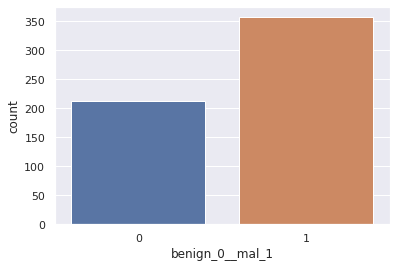

In [ ]:
sns.countplot('benign_0__mal_1',data=df)

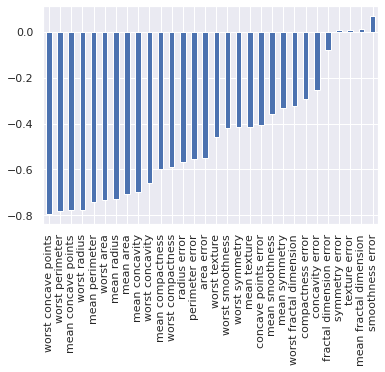

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

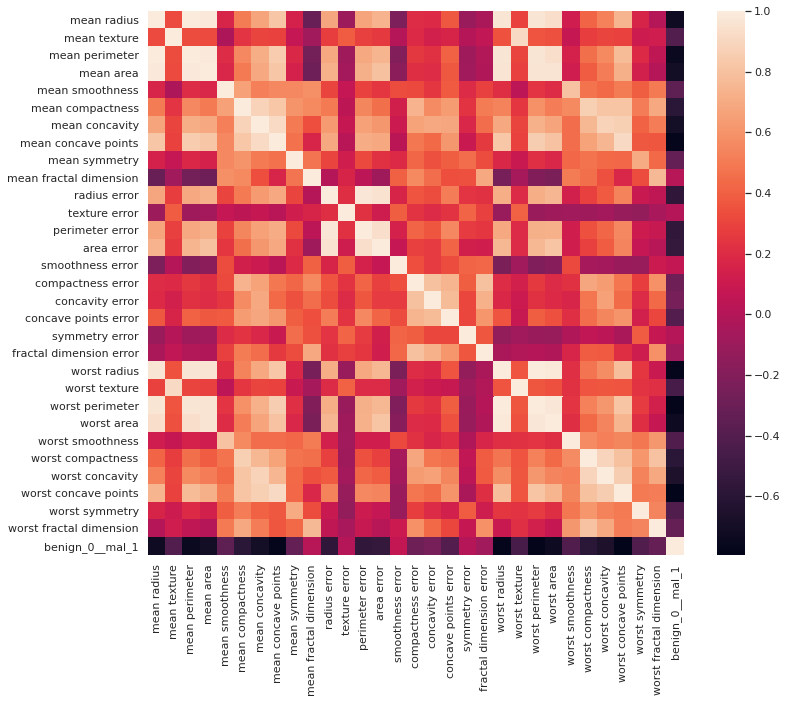

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

In [ ]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [ ]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

(426, 30)

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),verbose=2)

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0357 - val_loss: 0.2556
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0273 - val_loss: 0.2082
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0290 - val_loss: 0.2066
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0483 - val_loss: 0.2624
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0353 - val_loss: 0.2192
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0282 - val_loss: 0.2223
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0259 - val_loss: 0.2146
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0253 - val_loss: 0.2277
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0260 - val_loss: 0.2076
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0277 - val_loss: 0.2220
Epoch 11/

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,val_loss
0,0.035729,0.255633
1,0.027327,0.208157
2,0.029027,0.206581
3,0.048281,0.262357
4,0.035323,0.219239
...,...,...
595,0.002640,0.524175
596,0.002916,0.506807
597,0.002396,0.506467
598,0.002631,0.501951


<Figure size 1080x576 with 0 Axes>

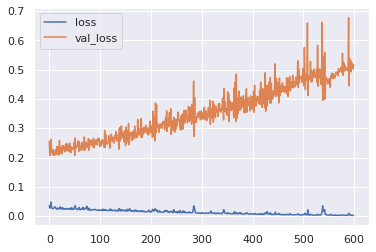

In [ ]:
plt.figure(figsize=(15,8))
losses.plot()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping  

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6652 - val_loss: 0.6496
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6292 - val_loss: 0.6162
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5899 - val_loss: 0.5693
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5392 - val_loss: 0.5135
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4877 - val_loss: 0.4620
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4405 - val_loss: 0.4135
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3958 - val_loss: 0.3678
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3546 - val_loss: 0.3282
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3185 - val_loss: 0.2947
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2886 - val_loss: 0.2675
Epoch 11

In [ ]:
model_loss = pd.DataFrame(model.history.history)

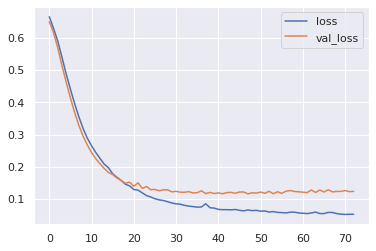

In [ ]:
model_loss.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5)) 

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.7001 - val_loss: 0.6749
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6756 - val_loss: 0.6533
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6520 - val_loss: 0.6275
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6552 - val_loss: 0.6078
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6209 - val_loss: 0.5862
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6166 - val_loss: 0.5649
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5899 - val_loss: 0.5415
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5783 - val_loss: 0.5195
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5576 - val_loss: 0.4955
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5486 - val_loss: 0.4756
Epoch 11

In [ ]:
model_loss = pd.DataFrame(model.history.history)

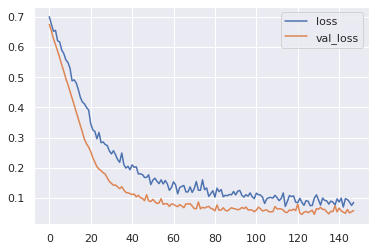

In [ ]:
model_loss.plot()

In [ ]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
